In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("flipkartupdated.csv")  # Change the path accordingly

# Display first 5 rows
df.head()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_17107/1797060952.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flipkartupdated.csv")  # Change the path accordingly


,Product_name,Rate,Summary,Price_cleaned,Review_cleaned
0,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,it's really worth every single penny. it works...,10499.0,simply awesome
1,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",4,I bought Crompton Ozone 75 Desert Air Cooler i...,10499.0,worth money desert cooler live name
2,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,GREAT packaging by seller. As this was the mos...,10499.0,worth every penny
3,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,Delivery was delayed by two days except this e...,10499.0,fabulous
4,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",4,A Good cooler by Crompton. The height of the c...,10499.0,nice product


In [2]:
# Convert Rate to numeric (if not already)
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# Drop NaN values
df = df.dropna(subset=["Rate", "Price_cleaned"])

# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 363239 entries, 0 to 363241
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product_name    363239 non-null  object 
 1   Rate            363239 non-null  float64
 2   Summary         361233 non-null  object 
 3   Price_cleaned   363239 non-null  float64
 4   Review_cleaned  363226 non-null  object 
dtypes: float64(2), object(3)
memory usage: 16.6+ MB


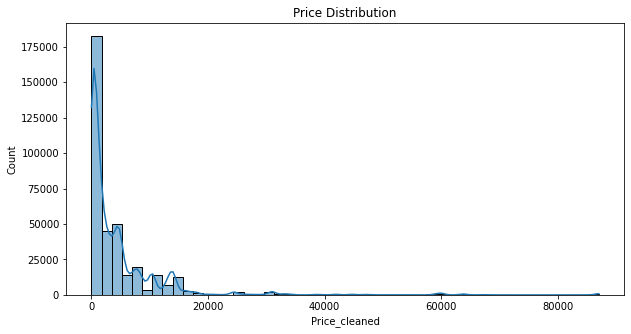

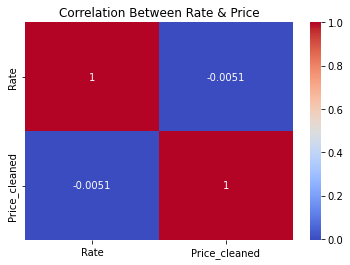

In [3]:
# Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price_cleaned"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Rate", "Price_cleaned"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Rate & Price")
plt.show()


In [4]:
# Define features and target
X = df[["Rate"]]  # Using Rate as predictor
y = df["Price_cleaned"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 8010.345155454735
R² Score: 0.00029253206608303994


In [5]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLP resources
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
df = pd.read_csv("flipkartupdated.csv")  # Adjust file path

# Display first few rows
df.head()


[nltk_data] Downloading package stopwords to /home/dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_17107/765288429.py:21: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flipkartupdated.csv")  # Adjust file path


,Product_name,Rate,Summary,Price_cleaned,Review_cleaned
0,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,it's really worth every single penny. it works...,10499.0,simply awesome
1,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",4,I bought Crompton Ozone 75 Desert Air Cooler i...,10499.0,worth money desert cooler live name
2,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,GREAT packaging by seller. As this was the mos...,10499.0,worth every penny
3,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",5,Delivery was delayed by two days except this e...,10499.0,fabulous
4,"Crompton 75 L Desert Air Cooler?Â?Â(White, T...",4,A Good cooler by Crompton. The height of the c...,10499.0,nice product


In [6]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text_tokens = word_tokenize(text)  # Tokenize words
    text = " ".join([word for word in text_tokens if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning function to Review_cleaned column
df["Review_cleaned"] = df["Review_cleaned"].astype(str).apply(clean_text)

# Display cleaned reviews
df[["Review_cleaned"]].head()


,Review_cleaned
0,simply awesome
1,worth money desert cooler live name
2,worth every penny
3,fabulous
4,nice product


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download and initialize VADER
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Review_cleaned"].apply(get_sentiment)

# Display count of each sentiment
df["Sentiment"].value_counts()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dell/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment
Positive    281189
Neutral      51525
Negative     30528
Name: count, dtype: int64

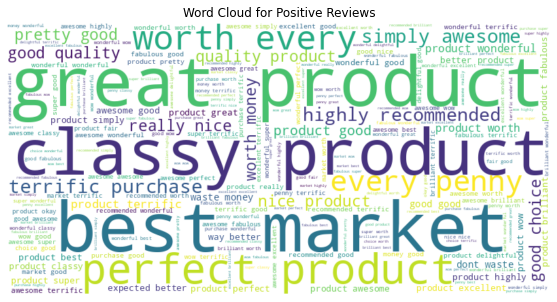

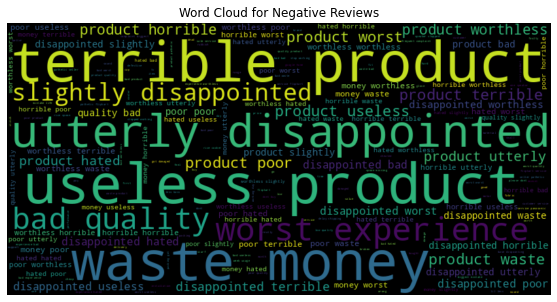

In [8]:
# Separate positive and negative reviews
positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review_cleaned"])
negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review_cleaned"])

# Word Cloud for Positive Words
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Word Cloud for Negative Words
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


Accuracy: 0.9975498630400969

Classification Report:
               precision    recall  f1-score   support

          -1       0.99      1.00      0.99      6092
           0       1.00      0.99      0.99     10402
           1       1.00      1.00      1.00     56155

    accuracy                           1.00     72649
   macro avg       1.00      1.00      1.00     72649
weighted avg       1.00      1.00      1.00     72649



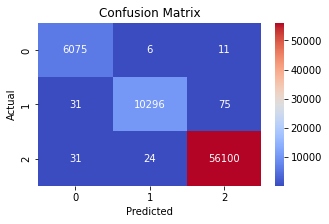

In [9]:
# Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["Review_cleaned"])

# Encode Sentiments (Convert labels to numbers)
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["Sentiment_Label"] = df["Sentiment"].map(sentiment_mapping)

# Define features and target variable
y = df["Sentiment_Label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Count number of reviews per product
product_reviews = df.groupby("Product_name")["Review_cleaned"].count().reset_index()
product_reviews.columns = ["Product_name", "Total_Reviews"]

# Sort by most reviewed products
product_reviews = product_reviews.sort_values(by="Total_Reviews", ascending=False)

# Display top 10 most reviewed products
product_reviews.head(10)


,Product_name,Total_Reviews
123,Bumtum Baby Pull-Up Diaper Pants Combo Pack - ...,9937
543,MILTON Thermosteel Flip Lid 500 ml Flask?Â?Â...,9278
1104,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,8870
666,PHILIPS SPA4040B/94 45 W Bluetooth Home Theatr...,8693
586,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,8222
518,Lakm?? Eyeconic Kajal Twin Pack?Â?Â(Deep Bla...,8218
669,PHILIPS SPA8140B/94 38 W Bluetooth Home Theatr...,7914
347,Google Home Mini with Google Assistant Smart S...,7390
258,Ephemeral LCD Writing 8.5 Inch Tablet Electron...,5876
299,Flipkart SmartBuy 500 cm Wall Stickers Wallpap...,4980


In [13]:
# Group by Product and compute percentage of positive reviews
product_sentiment = df.groupby("Product_name")["Sentiment"].value_counts(normalize=True).unstack().fillna(0)

# Rename columns
product_sentiment.columns = ["Negative", "Neutral", "Positive"]

# Sort by most positively reviewed products
best_products = product_sentiment.sort_values(by="Positive", ascending=False)

# Sort by worst-reviewed products
worst_products = product_sentiment.sort_values(by="Negative", ascending=False)

# Display top 10 best & worst products
best_products.head(10), worst_products.head(10)


(                                                    Negative   Neutral  \
 Product_name                                                             
 VARDHMAN Velcro tape industial quality , 2 inch...      0.00  0.000000   
 IMPEX Multimedia 5.1 (BRAVO) Bluetooth Home The...      0.00  0.000000   
 APPLE iPad mini (6th Gen) 256 GB ROM 8.3 inch w...      0.00  0.000000   
 APPLE iPad mini (6th Gen) 256 GB ROM 8.3 inch w...      0.00  0.000000   
 Acnos Wood Portable Laptop Table?Â?Â(Finish C...      0.00  0.000000   
 Moonstruck SEABREEZE DELUX COMBO PACK mixer and...      0.00  0.000000   
 Lenovo Tab Yoga 11 4 GB RAM 128 GB ROM 11 inch ...      0.00  0.000000   
 SONY XM-N1004 Multi Class AB Car Amplifier              0.00  0.000000   
 3D METRO SUPER STORE METRO_MIXER Pro 0 Juicer (...      0.00  0.035714   
 Chhariya Crafts Metal Krishna with Cow Standing...      0.01  0.040000   
 
                                                     Positive  
 Product_name                     

/tmp/ipykernel_17107/681595998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_products.head(10)["Positive"], y=best_products.head(10).index, palette="Greens")
/home/dell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


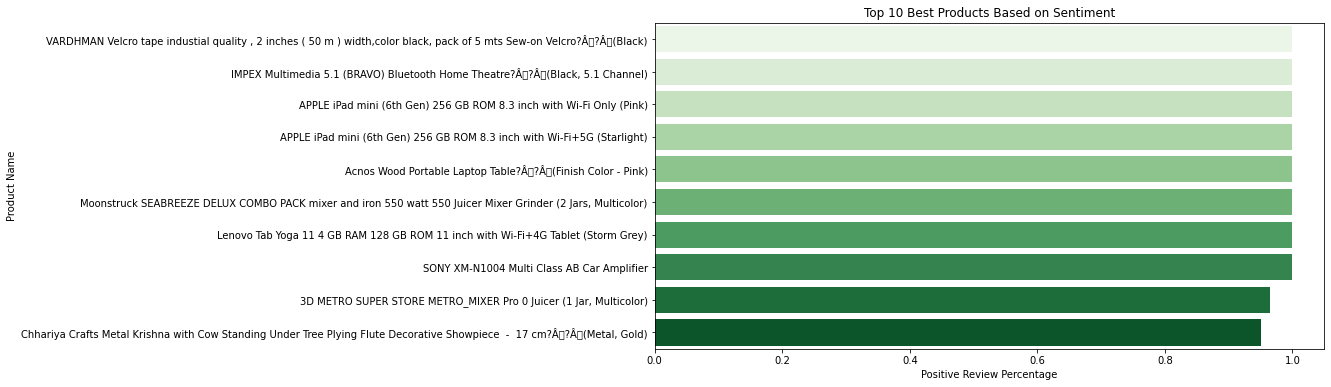

/tmp/ipykernel_17107/681595998.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_products.head(10)["Negative"], y=worst_products.head(10).index, palette="Reds")
/home/dell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


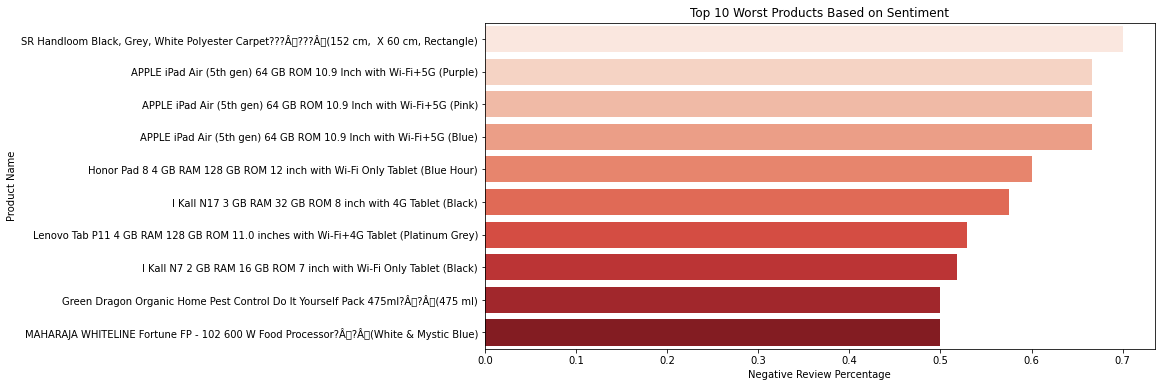

In [14]:
# Best Products - Most Positive Reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=best_products.head(10)["Positive"], y=best_products.head(10).index, palette="Greens")
plt.xlabel("Positive Review Percentage")
plt.ylabel("Product Name")
plt.title("Top 10 Best Products Based on Sentiment")
plt.show()

# Worst Products - Most Negative Reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=worst_products.head(10)["Negative"], y=worst_products.head(10).index, palette="Reds")
plt.xlabel("Negative Review Percentage")
plt.ylabel("Product Name")
plt.title("Top 10 Worst Products Based on Sentiment")
plt.show()


In [16]:
df.columns

Index(['Product_name', 'Rate', 'Summary', 'Price_cleaned', 'Review_cleaned',
       'Sentiment', 'Sentiment_Label'],
      dtype='object')

In [24]:
most_reviewed_products = df.groupby("Product_name")["Review_cleaned"].sum().reset_index()
most_reviewed_products = most_reviewed_products.sort_values(by="Review_cleaned", ascending=False)

# Display the top 5 most reviewed products
print(most_reviewed_products.head(5))


                                           Product_name  \
857   Sana Carpet Brown Silk, Jute Carpet???Â???Â(...   
718       Ponmani Nano Tech Wet Grinder????(Multicolor)   
308   Flipkart SmartBuy Classic Electric Rice Cooker...   
1079  ZEBRONICS Zeb-Vita Plus 16 W Bluetooth Laptop/...   
260   Eurodomo Hood Indigo PRO HC SC FL BK 60 Auto C...   

                                         Review_cleaned  
857   wowworth moneybad qualityworth every pennyawes...  
718   wowworth every pennybest price pointterrific p...  
308   wowwonderfulworth moneysuperwonderfulawesomemu...  
1079  wowwonderfulfabuloushighly recommendedwowaweso...  
260   woww productbest marketbest marketfabulousterr...  


In [26]:
# Convert 'Rate' to numeric, forcing errors to NaN
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# Drop any rows where 'Rate' is NaN
df = df.dropna(subset=["Rate"])


In [27]:
top_rated_products = df.groupby("Product_name")["Rate"].mean().reset_index()
top_rated_products = top_rated_products.sort_values(by="Rate", ascending=False)

# Display the top 5 highest-rated products
print(top_rated_products.head(5))


                                           Product_name      Rate
80                       BAJAJ FX7 600 W Food Processor  5.000000
865   Sasimo 1.8 l (single pot) Electric Rice Cooker...  5.000000
1084  ZunVolt Power MG5 500 Mixer Grinder (3 Jars, W...  5.000000
535   Lopezs Microfiber Floor Mat?Â?Â(Grey-23mm, M...  4.952381
392   HYGEX Magic Copy Book For Kids Magic Book Pen ...  4.920000


In [28]:
print(df["Rate"].unique())  # Check unique values in the 'Rate' column


[5. 4. 3. 1. 2.]


/tmp/ipykernel_17107/2688711756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rate", y="Product_name", data=top_rated_products.head(5), palette="viridis")
/home/dell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


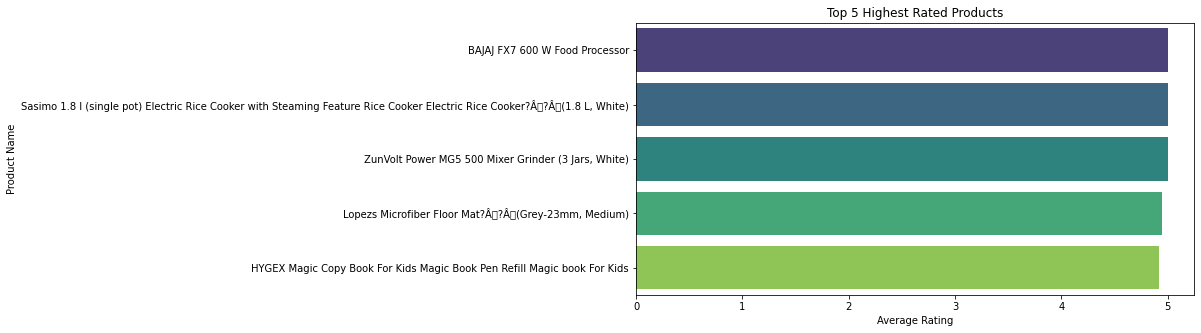

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="Rate", y="Product_name", data=top_rated_products.head(5), palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.title("Top 5 Highest Rated Products")
plt.show()


In [30]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
